In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import numpy

from pomegranate import *

numpy.random.seed(0)
numpy.set_printoptions(suppress=True)

%load_ext watermark
%watermark -m -n -p numpy,scipy,pomegranate

In C:\Users\THINKPAD\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\THINKPAD\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\THINKPAD\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\THINKPAD\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\THINKPAD\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

Tue Sep 22 2020 

numpy 1.16.5
scipy 1.3.1
pomegranate 0.13.4

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
CPU cores  : 4
interpreter: 64bit


In [2]:

# randomly setting score for the guests' initial door selection
guest = DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})

# randomly setting score for the door the prize is behind 
prize = DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})

# Setting scores for Monty with respect to each possible combination of three variables 
# (with repitation of each variabel is allowed) as it is dependent on the selection of both the guest and the prize. 
monty = ConditionalProbabilityTable(
        [[ 'A', 'A', 'A', 0.0 ],
         [ 'A', 'A', 'B', 0.5 ],
         [ 'A', 'A', 'C', 0.5 ],
         [ 'A', 'B', 'A', 0.0 ],
         [ 'A', 'B', 'B', 0.0 ],
         [ 'A', 'B', 'C', 1.0 ],
         [ 'A', 'C', 'A', 0.0 ],
         [ 'A', 'C', 'B', 1.0 ],
         [ 'A', 'C', 'C', 0.0 ],
         [ 'B', 'A', 'A', 0.0 ],
         [ 'B', 'A', 'B', 0.0 ],
         [ 'B', 'A', 'C', 1.0 ],
         [ 'B', 'B', 'A', 0.5 ],
         [ 'B', 'B', 'B', 0.0 ],
         [ 'B', 'B', 'C', 0.5 ],
         [ 'B', 'C', 'A', 1.0 ],
         [ 'B', 'C', 'B', 0.0 ],
         [ 'B', 'C', 'C', 0.0 ],
         [ 'C', 'A', 'A', 0.0 ],
         [ 'C', 'A', 'B', 1.0 ],
         [ 'C', 'A', 'C', 0.0 ],
         [ 'C', 'B', 'A', 1.0 ],
         [ 'C', 'B', 'B', 0.0 ],
         [ 'C', 'B', 'C', 0.0 ],
         [ 'C', 'C', 'A', 0.5 ],
         [ 'C', 'C', 'B', 0.5 ],
         [ 'C', 'C', 'C', 0.0 ]], [guest, prize])

In [3]:
# naming the distribution and objects 
s1 = State(guest, name="guest")
s2 = State(prize, name="prize")
s3 = State(monty, name="monty")

In [4]:
model = BayesianNetwork("Monty Hall Problem")

# adding the three states to the network 
model.add_states(s1, s2, s3)

In [5]:
# adding edges which represent conditional dependencies, where the second node is 
# conditionally dependent on the first node
# So Monty is dependent on both guest and prize
model.add_edge(s1, s3)
model.add_edge(s2, s3)

In [6]:
# the model must be baked to finalize the internals. Since Bayesian networks use factor graphs for inference, 
# an explicit factor graph is produced from the Bayesian network during the bake step.
model.bake()

In [7]:
# the probabilities of the model can be calculated of a sample under the Bayesian network 
# in the same way that it can be calculated probabilities under other models. 
# in the following the probability that initially door A was chosen, 
# Monty then opened door B, but that the actual car was behind door C
model.probability([['A', 'B', 'C']])

0.11111111111111109

In [8]:
# now looking at an impossible situation, when the probability of initially saying door A, 
# that Monty opened door B, and that the car was actually behind door B
model.probability([['A', 'B', 'B']])

0.0

In [9]:
# pomegranate uses the loopy belief propagation algorithm to do inference
# the bayesian inference can be run using the predict_proba method and passing 
# in a dictionary of values, where the key is the name of the state and the value 
# is the observed value for that state
# the following is the scenerio when no values are supplied in the function, 
# the marginal of the graph, which is just the frequency of each value for 
# each variable over an infinite number of randomly drawn samples from the graph is drawn
model.predict_proba({})

array([{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "A" :0.33333333333333337,
            "B" :0.33333333333333337,
            "C" :0.33333333333333337
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "A" :0.33333333333333337,
            "B" :0.33333333333333337,
            "C" :0.33333333333333337
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "A" :0.3333333333333333,
            "C" :0.3333333333333333,
            "B" :0.3333333333333333
        }
    ],
    "frozen" :false
}], dtype=object)

In [10]:
# three DiscreteDistribution objects have been returned, each representing the marginal distribution for each variable, 
# in the same order they were put into the model
# the same result would be achieved if None was supplied instad of blank values
model.predict_proba([[None, None, None]])

[array([{
     "class" :"Distribution",
     "dtype" :"str",
     "name" :"DiscreteDistribution",
     "parameters" :[
         {
             "A" :0.33333333333333337,
             "B" :0.33333333333333337,
             "C" :0.33333333333333337
         }
     ],
     "frozen" :false
 },
        {
     "class" :"Distribution",
     "dtype" :"str",
     "name" :"DiscreteDistribution",
     "parameters" :[
         {
             "A" :0.33333333333333337,
             "B" :0.33333333333333337,
             "C" :0.33333333333333337
         }
     ],
     "frozen" :false
 },
        {
     "class" :"Distribution",
     "dtype" :"str",
     "name" :"DiscreteDistribution",
     "parameters" :[
         {
             "A" :0.3333333333333333,
             "C" :0.3333333333333333,
             "B" :0.3333333333333333
         }
     ],
     "frozen" :false
 }], dtype=object)]

In [11]:
#  now testing random samples for analyzing the outcome
model.predict_proba([['A', None, None]])

[array(['A',
        {
     "class" :"Distribution",
     "dtype" :"str",
     "name" :"DiscreteDistribution",
     "parameters" :[
         {
             "A" :0.3333333333333333,
             "B" :0.3333333333333333,
             "C" :0.3333333333333333
         }
     ],
     "frozen" :false
 },
        {
     "class" :"Distribution",
     "dtype" :"str",
     "name" :"DiscreteDistribution",
     "parameters" :[
         {
             "A" :0.0,
             "C" :0.49999999999999983,
             "B" :0.49999999999999983
         }
     ],
     "frozen" :false
 }], dtype=object)]

In [12]:
#  the previous result yields that Monty will not open door 'A', because the guest has chosen it. 
# At the same time, the distribution over the prize has not changed, 
# it is still equally likely that the prize is behind each door
# now trying that Monty opens door 'C' to observe what happens 
# a dictionary rather than a list simply is used to show how 
# one can use both input forms depending on what is more convenient
model.predict_proba([{'guest': 'A', 'monty': 'C'}])

[array(['A',
        {
     "class" :"Distribution",
     "dtype" :"str",
     "name" :"DiscreteDistribution",
     "parameters" :[
         {
             "A" :0.3333333333333334,
             "B" :0.6666666666666664,
             "C" :0.0
         }
     ],
     "frozen" :false
 },
        'C'], dtype=object)]

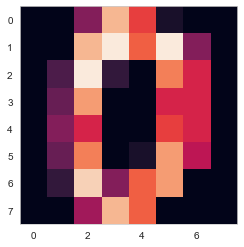

In [2]:
#  running the above case yields This demonstrates that when on the game show, it is always better to change the initial guess 
# after being shown an open door
from sklearn.datasets import load_digits

data = load_digits()
X, _ = data.data, data.target

plt.imshow(X[0].reshape(8, 8))
plt.grid(False)
plt.show()

X = X[:,:16]
X = (X > numpy.median(X)).astype('float64')

In [3]:
import numpy
numpy.random.seed(111)

i = numpy.random.randint(X.shape[0], size=10000)
j = numpy.random.randint(X.shape[1], size=10000)

X_missing = X.copy()
X_missing[i, j] = numpy.nan
X_missing

array([[ 0.,  0.,  1., ...,  1.,  1.,  0.],
       [ 0., nan, nan, ..., nan,  0.,  0.],
       [ 0.,  0., nan, ...,  1.,  0.,  0.],
       ...,
       [ 0.,  0., nan, ...,  1.,  0., nan],
       [ 0., nan, nan, ...,  1., nan,  0.],
       [nan,  0.,  1., ..., nan,  0., nan]])

In [16]:

from fancyimpute import SimpleFill

y_pred = SimpleFill().fit_transform(X_missing)[i, j]
numpy.abs(y_pred - X[i, j]).mean()

ModuleNotFoundError: No module named 'fancyimpute'

In [9]:
y_hat = BayesianNetwork.from_samples(X_missing, max_parents=1).predict(X_missing)
numpy.abs(numpy.array(y_hat)[i, j] - X[i, j]).mean()

NameError: name 'X_missing' is not defined

In [4]:
d1 = DiscreteDistribution({True: 0.2, False: 0.8})
d2 = DiscreteDistribution({True: 0.6, False: 0.4})
d3 = ConditionalProbabilityTable(
        [[True,  True,  True,  0.2],
         [True,  True,  False, 0.8],
         [True,  False, True,  0.3],
         [True,  False, False, 0.7],
         [False, True,  True,  0.9],
         [False, True,  False, 0.1],
         [False, False, True,  0.4],
         [False, False, False, 0.6]], [d1, d2])

s1 = State(d1, name="s1")
s2 = State(d2, name="s2")
s3 = State(d3, name="s3")

model = BayesianNetwork()
model.add_states(s1, s2, s3)
model.add_edge(s1, s3)
model.add_edge(s2, s3)
model.bake()

In [6]:
G.draw('file', format='png',prog='dot')

NameError: name 'G' is not defined

In [5]:
import pygraphviz 
numpy.random.seed(111)

X = numpy.random.randint(2, size=(15, 15))
X[:,5] = X[:,4] = X[:,3]
X[:,11] = X[:,12] = X[:,13]

model = BayesianNetwork.from_samples(X)
model.plot()

OSError: Format: "png" not recognized. Use one of:


In [17]:
import graphviz
model.structure

((),
 (10, 14),
 (9,),
 (1,),
 (3,),
 (4,),
 (7, 14),
 (0,),
 (0,),
 (),
 (),
 (6, 7),
 (11,),
 (12,),
 (0,))

In [21]:
model.predict([[False, False, False, False, None, None, False, None, False, None, True, None, None, True, False]])

[array([False, False, False, False, 0, 0, False, 1, False, 0, True, 1, 1,
        True, False], dtype=object)]

In [2]:
model.predict_proba([[False, False, False, False, False, False, False, None, False, None, 
                      True, None, None, True, False]])

NameError: name 'model' is not defined